In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
labels2019 = pd.read_csv('../isic2019/labels/official/ISIC_2019_Training_GroundTruth.csv')
labels2020 = pd.read_csv('../labels2020.csv')

In [3]:
duplicates2019 = pd.read_csv('cleanvision_results/duplicates2019.csv')
duplicates2020 = pd.read_csv('cleanvision_results/duplicates2020.csv')

In [4]:
duplicates2019

,first,second
0,1252,1609
1,2963,8458
2,3374,8535
3,13098,25291
4,13145,23971
5,13260,19824
6,13292,24269
7,13293,18154
8,13313,23511
9,13316,14954


In [5]:
duplicates2020

,first,second,third
0,0,17,28155
1,1,37,15554
2,2,38,13701
3,3,71,19545
4,4,89,24576
...,...,...,...
428,428,29369,31756
429,429,29408,32034
430,430,29722,32287
431,431,30510,32842


In [6]:
remove_ind2019, remove_ind2020 = [], [] 

remove_ind2019 += [17257, 23523] # dark_issue 2019

remove_ind2020 += [6158, 7006, 10945, 12689, 15758, 23973, 30781] # dark_issue 2020

In [7]:
remove_ind2019 += list(duplicates2019['second'].values)
print('Bad ISIC2019 images indices: ', len(remove_ind2019))

remove_ind2020 += list(duplicates2020['second'].values)
remove_ind2020 += list(duplicates2020['third'].values)
print('Bad ISIC2020 images indices: ', len(remove_ind2020))


Bad ISIC2019 images indices:  52
Bad ISIC2020 images indices:  873


In [8]:
remove_ind2019

[17257,
 23523,
 1609,
 8458,
 8535,
 25291,
 23971,
 19824,
 24269,
 18154,
 23511,
 14954,
 14568,
 13745,
 24712,
 18476,
 21588,
 20376,
 22221,
 20866,
 24558,
 17816,
 25279,
 17535,
 24431,
 20931,
 22229,
 18479,
 18295,
 24581,
 22164,
 18627,
 22720,
 19282,
 25177,
 25229,
 23034,
 19012,
 23191,
 19699,
 19664,
 23954,
 24430,
 20807,
 24787,
 25161,
 20520,
 21751,
 21988,
 24025,
 23919,
 24281]

In [11]:
img_names2019 = labels2019.image.values
path_dict2019 = {img_name:'../isic2019/images/official/' for img_name in img_names2019}

img_names2020 = labels2020.image_name.values
path_dict2020 = {img_name:'../train/' for img_name in img_names2020}

In [12]:
def get_path_by_index(index, dataset: str):
    if dataset == '2019':
        img_name = img_names2019[index]
        img_path = path_dict2019[img_name] + img_name + ".jpg"
        return img_path
    else:
        img_name = img_names2020[index]
        img_path  = path_dict2020[img_name] + img_name + ".jpg"
        return img_path


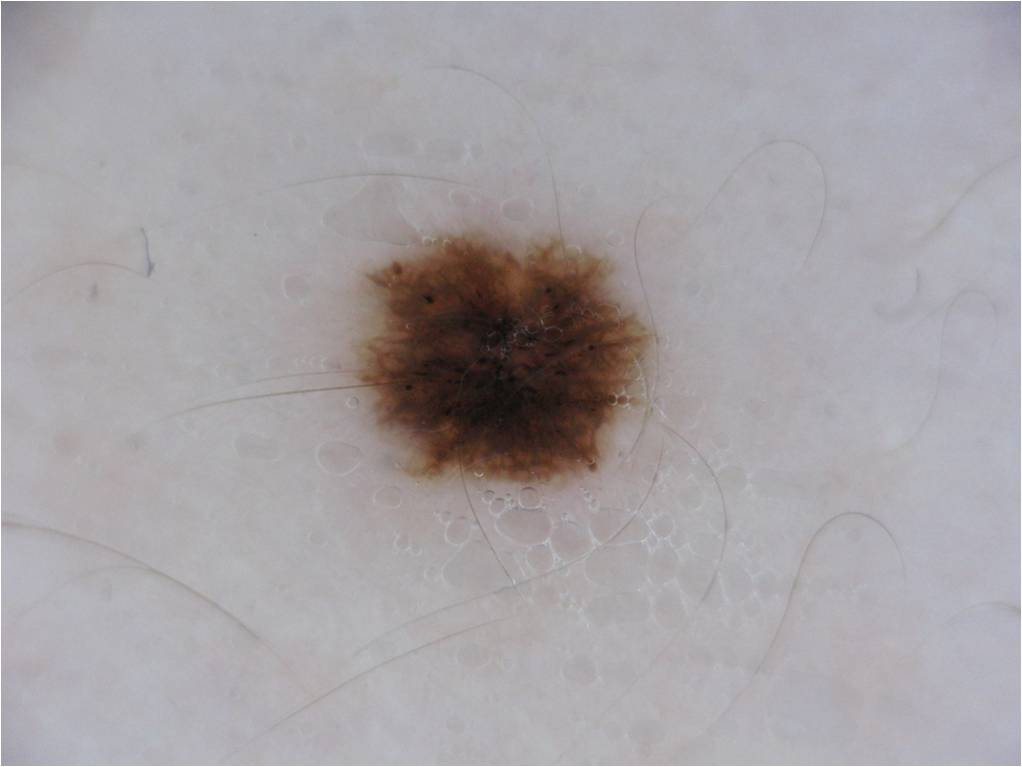

In [13]:
Image.open(get_path_by_index(1, '2019'))

In [ ]:
remove_ind2020

In [80]:
def clean_data():
    for ind in remove_ind2019:
        os.system(f"rm {get_path_by_index(ind, '2019')}")

    for ind in remove_ind2020:
        os.system(f"rm {get_path_by_index(ind, '2020')}")
    
    return labels2019.drop(remove_ind2019), labels2020.drop(remove_ind2020)

In [ ]:
labels2019, labels2020 = clean_data()

In [82]:
sdir = '../isic2019/images/official/'
flist = os.listdir(sdir)
len(flist)

25279

In [83]:
labels2020.shape[0]

32253

In [84]:
labels2019.to_csv('../isic2019/labels/official/ISIC_2019_Training_GroundTruth.csv', index=False)
labels2020.to_csv('../labels2020.csv', index=False)